# will test for focal correction for individual events
## will start with 2017071700 (strike slip mech=307,85,-178)

In [1]:
from rtergpy.run import defaults, event, etime2name, src2ergs
from rtergpy.waveforms import loadwaves
from obspy import UTCDateTime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
os.chdir('/Users/anewman/Documents/Projects/rterg/processing/Examples')

CMT=pd.read_csv('CMT_2017071700.txt', sep='\s+', comment="#")
EQ=CMT.iloc[0]
Defaults=defaults()
Defaults.edirbase='http://geophysics.eas.gatech.edu/anewman/research/RTerg/rterg/processing/Examples/events'
Event=event()
Event.newData=False # True is default
Event.ecount='00'
Event.iter="01"

In [2]:
EQ.DATE

'2017/07/17'

In [3]:
eloc = [EQ.LAT,EQ.LONG,EQ.DEPTH] 
#print(EQ.DATE,EQ.TIME)
year,mo,dd = EQ.DATE.split('/')
hh,mn,sec = EQ.TIME.split(':')
etime=(UTCDateTime(int(year),int(mo),int(dd),int(hh),int(mn),float(sec)))
Event.eventname=etime2name(etime,ecount=Event.ecount)
Event.origin=[eloc,etime]
Event.focmech=[EQ.STK, EQ.DP, EQ.RKE] # phi,delta,lmbda

print("\n\n"+Event.eventname+" ========================")



2017071700 ===============================


In [15]:
st,df=loadwaves(Defaults=Defaults,Event=Event) 
#st=pd.read_pickle('http://geophysics.eas.gatech.edu/anewman/research/RTerg/rterg/processing/Examples/events/2017/2017071700/01/pkls/Wavestream-raw_2017071700.pkl.gz', compression='gzip')
results=pd.read_pickle(Defaults.edirbase+'/2017/2017071700/01/pkls/Results_2017071700.pkl')
Etimeseries=pd.read_pickle(Defaults.edirbase+'/2017/2017071700/01/pkls/Etimeseries_2017071700.pkl')
StationTacer=pd.read_pickle(Defaults.edirbase+'/2017/2017071700/01/pkls/Etacer_2017071700.pkl')

In [16]:
results

,eventname,iteration,etime,elat,elon,edepth,focmech,network,chan,stationrange,...,ebbpertacmean,STD10(per),Me(per),ehfpertacmean,STD10(hfper),ebbcorrpertacmean,STD10(percorr),Me(corrper),ehfcorrpertacmean,STD10(hfpercorr)
0,2017071700,01,2017-07-17T23:34:13.900000Z,54.13,169.78,23.2,"[307, 85, -178]","CU,GT,IC,II,IU",BHZ,"[25, 80]",...,8706605405136635.0,0.291204,7.726566,238019402511201.6875,0.384308,40571893568278640.0,0.288804,8.17215,1109146150137052.25,0.387436


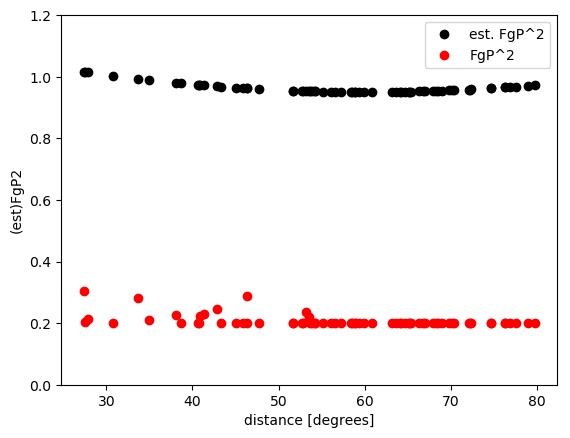

In [154]:
pd.set_option('max_columns', None)  # show all columns
plt.plot(StationTacer['distance'].str[1],StationTacer['estFgP2'], 'ko', label='est. FgP^2')
plt.plot(StationTacer['distance'].str[1],StationTacer['FgP2'], 'ro', label='FgP^2')
plt.ylim(0,1.2)
plt.xlabel('distance [degrees]')
plt.ylabel('(est)FgP2')
plt.legend()
plt.show()

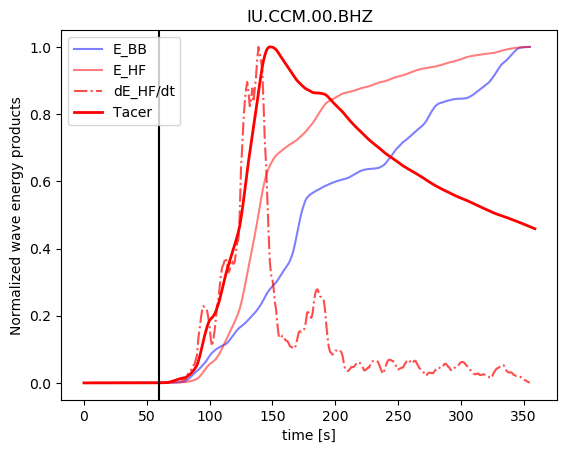

360


In [148]:
import numpy as np
station=StationTacer.iloc[31]
#station
#EBB0=Etimeseries.loc["EBB"][station.netstatchan]
#EHF0=Etimeseries.loc["EHF"][station.netstatchan]

EBBSm0=Etimeseries.loc["EBBSmooth"][station.netstatchan]
dEBBSm0=Etimeseries.loc["dEBBdtSmooth"][station.netstatchan]
tacBB0=Etimeseries.loc["tacerBB"][station.netstatchan]

EHFSm0=Etimeseries.loc["EHFSmooth"][station.netstatchan]
dEHFSm0=Etimeseries.loc["dEHFdtSmooth"][station.netstatchan]
tacfromP=Etimeseries.loc["tacerHF"][station.netstatchan]
tacHF0=pd.concat([pd.Series(np.zeros(60)),tacfromP],ignore_index=True)
plt.plot(EBBSm0/np.nanmax(EBBSm0),'b-',alpha=0.5, label='E_BB'); 
plt.plot(EHFSm0/np.nanmax(EHFSm0),'r-',alpha=0.5, label='E_HF'); 
#plt.plot(dEBBSm0/np.nanmax(dEBBSm0),'b', linestyle = 'dashed'); 
plt.plot(dEHFSm0/np.nanmax(dEHFSm0),'r-.', alpha=0.7, label='dE_HF/dt')
plt.plot(tacHF0/np.nanmax(tacHF0),'r-', linewidth = 2, label='Tacer'); 
plt.plot([60,60],[-0.05,1.05],'k-')
plt.legend(loc='upper left')
plt.ylim(-0.05,1.05)
plt.xlabel("time [s]")
plt.ylabel("Normalized wave energy products")
plt.title(station.netstatchan)
plt.show()
print(len(tacHF0))

In [125]:
#print(np.concatenate(np.zeros(60), tacHF0))
pd.concat(np.zeros(60),tacHF0)
#Etimeseries.iloc[2161:2520]

<ipython-input-125-e55ca21604a5>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  pd.concat(np.zeros(60),tacHF0)


TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

In [131]:
#tacHF0
pd.concat([pd.Series(np.zeros(60)),tacHF0],ignore_index=True)

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
355    7.767450e+11
356    7.741297e+11
357    7.715319e+11
358    7.689516e+11
359    7.663884e+11
Length: 360, dtype: float64